## ライブラリのインポート

In [1]:
import numpy as np
#サイキットラーン　（メモリの節約のため、sklearnの中からsvmのみをインポートする
from sklearn import svm
# アイリスの計測データ
from sklearn.datasets import load_iris
# 予測結果の精度表示
from sklearn import metrics
# 訓練データと検証データの分割
from sklearn.model_selection import train_test_split
# データを扱う
import pandas as pd
# グラフ描画
from matplotlib import pyplot as plt
import japanize_matplotlib

## テスト用データの読み込み

In [2]:
iris = load_iris()
iris_data=iris.data
iris_target=iris.target

In [3]:
# アイリスの計測データの各項目
## sepal length (cm)		がく片の長さ
## sepal width (cm)			がく片の幅
## petal length (cm)		花弁の長さ
## petal length (cm)		花弁の幅

# アイリスの計測データを表形式で表示
df_x=pd.DataFrame(iris.data ,columns=iris.feature_names)
df_x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# 花の種類の名前
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [5]:
# アイリスの計測データを分類結果で表示 (targetに分析結果が格納されている)
df_y=pd.DataFrame(iris.target ,columns=['target'])
# 0～49 までの50個の分類結果が"0" Setosa
df_y[0:11]

,target
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [6]:
# 50～99 までの50個の分類結果が"1" Versicolor
df_y[45:61]

,target
45,0
46,0
47,0
48,0
49,0
50,1
51,1
52,1
53,1
54,1


In [7]:
# 100～149 までの50個の分類結果が"2" Versinica
df_y[95:111]

,target
95,1
96,1
97,1
98,1
99,1
100,2
101,2
102,2
103,2
104,2


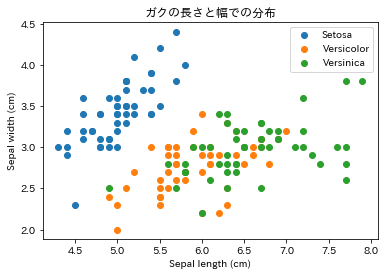

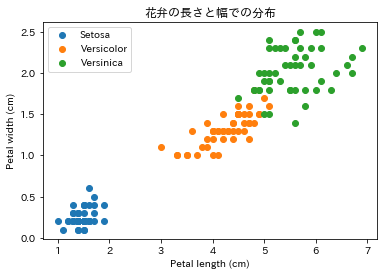

In [8]:
# 散布図で表示
st_data = iris_data[:50]      # Setosa
vc_data = iris_data[50:100]   # Versicolor
vn_data = iris_data[100:150]  # Versinica

plt.scatter(st_data[:, 0], st_data[:, 1], label="Setosa")      # Sepal lengthとSepal width
plt.scatter(vc_data[:, 0], vc_data[:, 1], label="Versicolor")  # Sepal lengthとSepal width
plt.scatter(vn_data[:, 0], vn_data[:, 1], label="Versinica")  # Sepal lengthとSepal width
plt.legend()
plt.title('ガクの長さと幅での分布')
plt.xlabel("Sepal length (cm)")    # ガクの長さ
plt.ylabel("Sepal width (cm)")     # ガクの幅
plt.show()

plt.scatter(st_data[:, 2], st_data[:, 3], label="Setosa")      # Petal lengthとPetal width
plt.scatter(vc_data[:, 2], vc_data[:, 3], label="Versicolor")  # Petal lengthとPetal width
plt.scatter(vn_data[:, 2], vn_data[:, 3], label="Versinica")   # Petal lengthとPetal width
plt.legend()
plt.title('花弁の長さと幅での分布')
plt.xlabel("Petal length (cm)")   # 花弁の長さ
plt.ylabel("Petal width (cm)")    # 花弁の幅
plt.show()

## 特微量のペアプロット（データ可視化）

In [9]:
# DataFrameからscatter_matrixを作成
from pandas.plotting import scatter_matrix
import mglearn
grr = scatter_matrix(df_x, c=iris.target, figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)
plt.show()

ModuleNotFoundError: No module named 'mglearn'

## 訓練データと検証データに分割する

In [12]:
# 訓練データと検証データの分割
# random_stateは再現性を確保するために指定する
X_train,X_test,y_train,y_test=train_test_split(iris_data, iris_target, test_size=0.4, random_state=1) 

## 学習する

In [13]:
# サポートベクターマシーン
clf = svm.SVC()  
# 訓練
clf.fit(X_train, y_train)  

SVC()

## 予測する

In [14]:
# 品種の判定 (Sepal length, Sepal width, Petal length, Petal width)
#  ３種類の値を渡す　：Setosaの想定、Versicolourの想定、Virginicaの想定
print(clf.predict([[5.1, 3.5, 1.4, 0.1], [6.5, 2.5, 4.4, 1.4], [5.9, 3.0, 6.2, 2.0]]))

[0 1 2]


## 予測値と正解の比較

In [15]:
y_hat = clf.predict(X_test)  # テストデータで予測
print(metrics.classification_report(y_test, y_hat))  # 正解率など
print('-----')
print(metrics.confusion_matrix(y_test, y_hat))  # 行:正解、列:予測

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.95      1.00      0.98        20

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

-----
[[19  0  0]
 [ 0 20  1]
 [ 0  0 20]]


## 検証データを使って予測値の検証

In [16]:
# 検証 <-訓練データ 
clf.score(X_train ,y_train)

0.9666666666666667

In [17]:
# 検証 <-検証データ
# (検証データと値が近いなら信用できる。
#  どこまでの差異を近いとするかはそれぞれ
#  判断する必要がある。)
clf.score(X_test,y_test)

0.9833333333333333

## 予測値の散布図描画

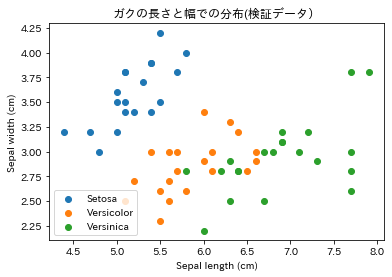

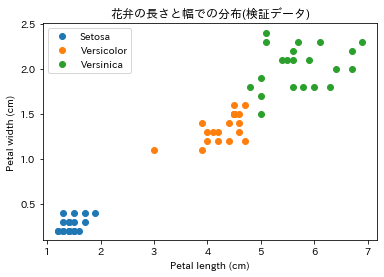

In [18]:
#予測結果を格納
st_predict_sepal = [[],[]]  # Setosa
st_predict_petal = [[],[]]  # Setosa
vc_predict_sepal = [[],[]]   # Versicolor
vc_predict_petal = [[],[]]   # Versicolor
vn_predict_sepal = [[],[]]   # Versinica
vn_predict_petal = [[],[]]   # Versinica
i = 0
# 予測値に対してデータを分割
for _y_hat in y_hat:
    if _y_hat == 0:
        st_predict_sepal[0].append(X_test[i][0])
        st_predict_sepal[1].append(X_test[i][1])
        st_predict_petal[0].append(X_test[i][2])
        st_predict_petal[1].append(X_test[i][3])
    elif _y_hat == 1:
        vc_predict_sepal[0].append(X_test[i][0])
        vc_predict_sepal[1].append(X_test[i][1])
        vc_predict_petal[0].append(X_test[i][2])
        vc_predict_petal[1].append(X_test[i][3])
    elif _y_hat == 2:
        vn_predict_sepal[0].append(X_test[i][0])
        vn_predict_sepal[1].append(X_test[i][1])
        vn_predict_petal[0].append(X_test[i][2])
        vn_predict_petal[1].append(X_test[i][3])
    i += 1

plt.scatter(st_predict_sepal[0], st_predict_sepal[1], label="Setosa")      # Sepal lengthとSepal width
plt.scatter(vc_predict_sepal[0], vc_predict_sepal[1], label="Versicolor")  # Sepal lengthとSepal width
plt.scatter(vn_predict_sepal[0], vn_predict_sepal[1], label="Versinica")  # Sepal lengthとSepal width
plt.legend()
plt.title('ガクの長さと幅での分布(検証データ）')
plt.xlabel("Sepal length (cm)")    # ガクの長さ
plt.ylabel("Sepal width (cm)")     # ガクの幅
plt.show()

plt.scatter(st_predict_petal[0], st_predict_petal[1], label="Setosa")      # Petal lengthとPetal width
plt.scatter(vc_predict_petal[0], vc_predict_petal[1], label="Versicolor")  # Petal lengthとPetal width
plt.scatter(vn_predict_petal[0], vn_predict_petal[1], label="Versinica")   # Petal lengthとPetal width
plt.legend()
plt.title('花弁の長さと幅での分布(検証データ)')
plt.xlabel("Petal length (cm)")   # 花弁の長さ
plt.ylabel("Petal width (cm)")    # 花弁の幅
plt.show()

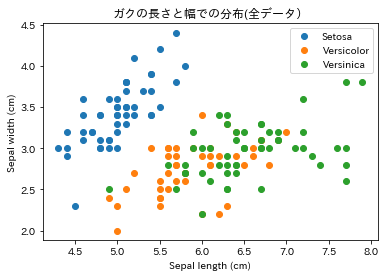

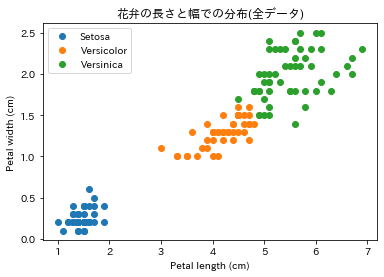

In [19]:
y_hat2 = clf.predict(iris_data)  # テストデータ全件で予測

#予測結果を格納
st_predict_sepal = [[],[]]  # Setosa
st_predict_petal = [[],[]]  # Setosa
vc_predict_sepal = [[],[]]   # Versicolor
vc_predict_petal = [[],[]]   # Versicolor
vn_predict_sepal = [[],[]]   # Versinica
vn_predict_petal = [[],[]]   # Versinica
i = 0
# 予測値に対してデータを分割
for _y_hat in y_hat2:
    if _y_hat == 0:
        st_predict_sepal[0].append(iris_data[i][0])
        st_predict_sepal[1].append(iris_data[i][1])
        st_predict_petal[0].append(iris_data[i][2])
        st_predict_petal[1].append(iris_data[i][3])
    elif _y_hat == 1:
        vc_predict_sepal[0].append(iris_data[i][0])
        vc_predict_sepal[1].append(iris_data[i][1])
        vc_predict_petal[0].append(iris_data[i][2])
        vc_predict_petal[1].append(iris_data[i][3])
    elif _y_hat == 2:
        vn_predict_sepal[0].append(iris_data[i][0])
        vn_predict_sepal[1].append(iris_data[i][1])
        vn_predict_petal[0].append(iris_data[i][2])
        vn_predict_petal[1].append(iris_data[i][3])
    i += 1

plt.scatter(st_predict_sepal[0], st_predict_sepal[1], label="Setosa")      # Sepal lengthとSepal width
plt.scatter(vc_predict_sepal[0], vc_predict_sepal[1], label="Versicolor")  # Sepal lengthとSepal width
plt.scatter(vn_predict_sepal[0], vn_predict_sepal[1], label="Versinica")  # Sepal lengthとSepal width
plt.legend()
plt.title('ガクの長さと幅での分布(全データ）')
plt.xlabel("Sepal length (cm)")    # ガクの長さ
plt.ylabel("Sepal width (cm)")     # ガクの幅
plt.show()

plt.scatter(st_predict_petal[0], st_predict_petal[1], label="Setosa")      # Petal lengthとPetal width
plt.scatter(vc_predict_petal[0], vc_predict_petal[1], label="Versicolor")  # Petal lengthとPetal width
plt.scatter(vn_predict_petal[0], vn_predict_petal[1], label="Versinica")   # Petal lengthとPetal width
plt.legend()
plt.title('花弁の長さと幅での分布(全データ)')
plt.xlabel("Petal length (cm)")   # 花弁の長さ
plt.ylabel("Petal width (cm)")    # 花弁の幅
plt.show()

## 予測する

In [20]:
def print_predict(_x , _y):
    print('入力データ',_x)
    y_predict = clf.predict(_x)
    print('予測値',y_predict)
    print('正解',_y)

In [21]:
# 全データの１件目　　：　Setosa
print_predict(iris_data[0:1] , iris_target[0:1])

入力データ [[5.1 3.5 1.4 0.2]]
予測値 [0]
正解 [0]


In [22]:
# 全データの５１件目：　Versicolor
print_predict(iris_data[51:52] , iris_target[51:52])

入力データ [[6.4 3.2 4.5 1.5]]
予測値 [1]
正解 [1]


In [23]:
# 全データの１０１件目　　：　Versinica
print_predict(iris_data[101:102] , iris_target[101:102])

入力データ [[5.8 2.7 5.1 1.9]]
予測値 [2]
正解 [2]


In [40]:
request = [
    {
        "sepal_length" :3.1,
        "sepal_width"  :3.2,
        "petal_length" :3.3,
        "petal_width"  :3.4
    }
]

x_pred = pd.DataFrame(request)
x_pred = x_pred.rename(columns={'sepal_length':'sepal length (cm)','sepal_width':'sepal width (cm)','petal_length':'petal length (cm)','petal_width':'petal width (cm)' })
x_pred
        

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,3.1,3.2,3.3,3.4


In [41]:
x_pred.iat[0,1]

3.2

In [28]:
result = clf.predict(x_pred)  # テストデータで予測

In [29]:
result

array([2])

In [44]:
from collections import defaultdict
predictions = defaultdict(int)
se_setosa = defaultdict(int)
se_versicolor = defaultdict(int)
se_virginica = defaultdict(int)
pe_setosa = defaultdict(int)
pe_versicolor = defaultdict(int)
pe_virginica = defaultdict(int)

        
if result[0] == 0:
    se_setosa['x'] = x_pred.iat[0,0]
    se_setosa['y'] = x_pred.iat[0,1]
    pe_setosa['x'] = x_pred.iat[0,2]
    pe_setosa['y'] = x_pred.iat[0,3]

if result[0] == 1:
    se_versicolor['x'] = x_pred.iat[0,0]
    se_versicolor['y'] = x_pred.iat[0,1]
    pe_versicolor['x'] = x_pred.iat[0,2]
    pe_versicolor['y'] = x_pred.iat[0,3]

if result[0] == 2:
    se_virginica['x'] = x_pred.iat[0,0]
    se_virginica['y'] = x_pred.iat[0,1]
    pe_virginica['x'] = x_pred.iat[0,2]
    pe_virginica['y'] = x_pred.iat[0,3]
predictions['se_setosa'] = se_setosa.copy()
predictions['se_versicolor'] = se_versicolor.copy()
predictions['se_virginica'] = se_virginica.copy()
predictions['pe_setosa'] = pe_setosa.copy()
predictions['pe_versicolor'] = pe_versicolor.copy()
predictions['pe_virginica'] = pe_virginica.copy()
print(predictions)

defaultdict(<class 'int'>, {'se_setosa': defaultdict(<class 'int'>, {}), 'se_versicolor': defaultdict(<class 'int'>, {}), 'se_virginica': defaultdict(<class 'int'>, {'x': 3.1, 'y': 3.2}), 'pe_setosa': defaultdict(<class 'int'>, {}), 'pe_versicolor': defaultdict(<class 'int'>, {}), 'pe_virginica': defaultdict(<class 'int'>, {'x': 3.3, 'y': 3.4})})
